## Overview
In this notebook we analyse the RITA airlines data set with focus on flight delays.<br>
To start, it is always important to go through some data exploration in order to get familiar with the data. The purpose of this step is to identify the different data fields, detect null/odd values, have an idea about data quality and potential quality improvements to lastly decide how to format the data in a way that allows us to easily perform further analysis and processing. By the end of this step we should be able to conclude about data quality, have an overall idea about the information that we can learn from the data.<br>
After exploring, it would be possible to perform some commands in order to make the data more usable. In the case of this exercise. I found it useful to apply label encoding on the categorical features to be able to perform an initial prediction for the arrival delays.<br>

Below is the plan for this workshop:<br>

* Prerequisites<br>
* Explortory data analysis <br>
* Predicting departure delays<br>

Of course, this is an initial analysis and there is definitely a room for improvement. The goal is to get rather familiar with the process and the the tools that allows you to solve business problems with data Science.<br>

## 1. Prerequisites
### Installing Jupyter 
https://jupyter.org/install
### Getting the data set & variables decription
http://stat-computing.org/dataexpo/2009/the-data.html
### Usefull links
Understanding confusion matrix
https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62
<br>Precision and recall 
https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c
### Importing needed libraries and defining some functions



In [2]:
'''IMPORTING NEEDED LIBRARIES'''
%matplotlib inline
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
#from sklearn.base import TransformerMixin 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

## 2.Explortory data analysis
First thing we start by loading the data, having an idea about its content and specifying types for some of the variabbles that we will be analysing.

In [3]:
flights = 'data/2008.csv'
df_flights =pd.read_csv(flights, delimiter=',')
# setting pandas display options to be able to display all rows 
pd.set_option('display.max_rows', 500) 
pd.set_option('display.max_columns', 500) 
pd.set_option('display.width', 1000)

In [4]:
#Cheching the header of the csv file
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,N612SW,88.0,90.0,78.0,-6.0,-4.0,IND,BWI,515,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [5]:
#Cheching the size of the csv file
df_flights.shape

(7009728, 29)

To keep it simple, we will limit the scope of this workshop to a sample of the dataset. For tht we will use the sklearn sampling method and use only 5% of the data.

In [6]:
#sampling
df = df_flights.sample(frac =.01)
df.shape

(70097, 29)

No we take a look again at the sample, we check if there are missing values and we chose a subset of columns that are relevant to our predictive model.

In [7]:
#checcking missing values
df.isnull().values.any()

True

In [8]:
df.isnull().sum()

Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
DepTime               1342
CRSDepTime               0
ArrTime               1481
CRSArrTime               0
UniqueCarrier            0
FlightNum                0
TailNum                801
ActualElapsedTime     1508
CRSElapsedTime           6
AirTime               1508
ArrDelay              1508
DepDelay              1342
Origin                   0
Dest                     0
Distance                 0
TaxiIn                1481
TaxiOut               1350
Cancelled                0
CancellationCode     68742
Diverted                 0
CarrierDelay         54947
WeatherDelay         54947
NASDelay             54947
SecurityDelay        54947
LateAircraftDelay    54947
dtype: int64

In [9]:
#taking a subset of the columns
df = df[["FlightNum","Month", "DayofMonth", "DayOfWeek", "Origin", "Dest", "CRSDepTime", "ArrDelay"]]
df.isnull().sum()

FlightNum        0
Month            0
DayofMonth       0
DayOfWeek        0
Origin           0
Dest             0
CRSDepTime       0
ArrDelay      1508
dtype: int64

In [10]:
#Labeling the flight delays column
def label_delay(row):
    if row["ArrDelay"] < 15:
        return 0
    else: 
        return 1
    
df = df.fillna({'ArrDelay': 16})
df["del15"]  = df.apply (lambda row: label_delay(row), axis=1)
    

In [11]:
df.head()

,FlightNum,Month,DayofMonth,DayOfWeek,Origin,Dest,CRSDepTime,ArrDelay,del15
936661,121,2,21,4,DFW,DEN,640,-27.0,0
1252712,168,3,26,3,LAS,OAK,2055,-1.0,0
934864,378,2,14,4,MKE,DEN,610,31.0,1
5754743,3815,10,16,4,DFW,SAV,1755,-9.0,0
4861932,1925,9,8,1,LAS,SJC,1550,84.0,1


In [12]:
df = df[["Month", "DayofMonth", "DayOfWeek", "Origin", "Dest", "CRSDepTime", "del15"]]
df.isnull().sum()

Month         0
DayofMonth    0
DayOfWeek     0
Origin        0
Dest          0
CRSDepTime    0
del15         0
dtype: int64

### Origin airport effect
First let's identify the top 10 most important airpots in terms of traffic and analyse the effect the origin airport effect on departure delays

In [13]:
# Top 10 airports in terms of number of flights
df.Origin.value_counts().head(10)


ATL    4210
ORD    3426
DFW    2760
DEN    2409
LAX    2197
PHX    1943
IAH    1874
LAS    1693
DTW    1662
SLC    1431
Name: Origin, dtype: int64

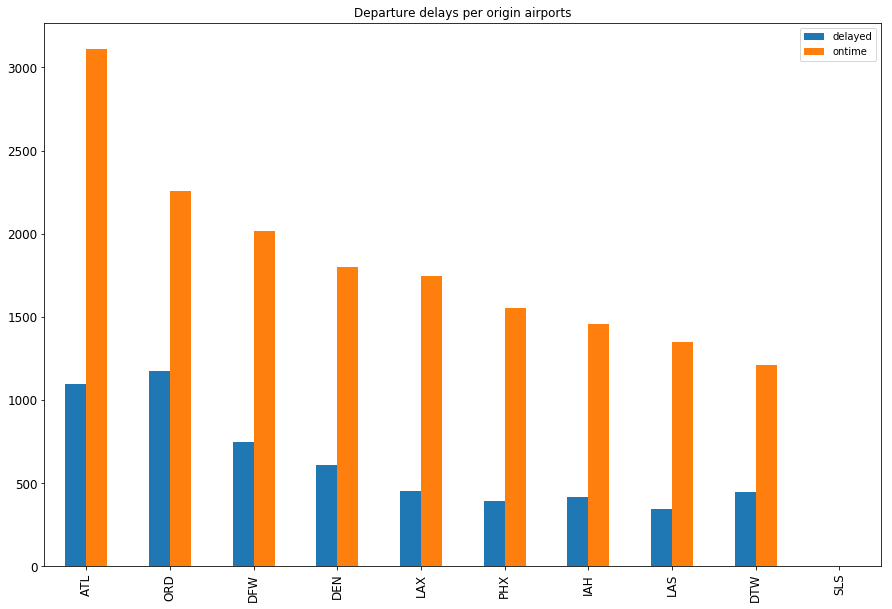

In [14]:
# How much delays per origin airports
#creating empty lists of delayed and on time flights
delayed=[]
ontime=[] 
# creating list of airports
top_air=['ATL','ORD','DFW','DEN','LAX','PHX','IAH','LAS','DTW','SLS'] 
# splitting the flights into delayed and ontime classes
for a in top_air:
    #print a
    delayed.append(df[(df['Origin']==a) & (df['del15']==1)].shape[0]) 
    ontime.append(df[(df['Origin']==a) & (df['del15']==0)].shape[0])
#creating a new dataframe 
df1=pd.DataFrame() 
df1['delayed']=delayed 
df1['ontime']=ontime 
df1.index=top_air
#creating the bar chart
ax = df1[['delayed','ontime']].plot(kind='bar', title ="Departure delays per origin airports", 
                                    figsize=(15, 10), legend=True, fontsize=12)
plt.show()


 

### DOW effect 


 

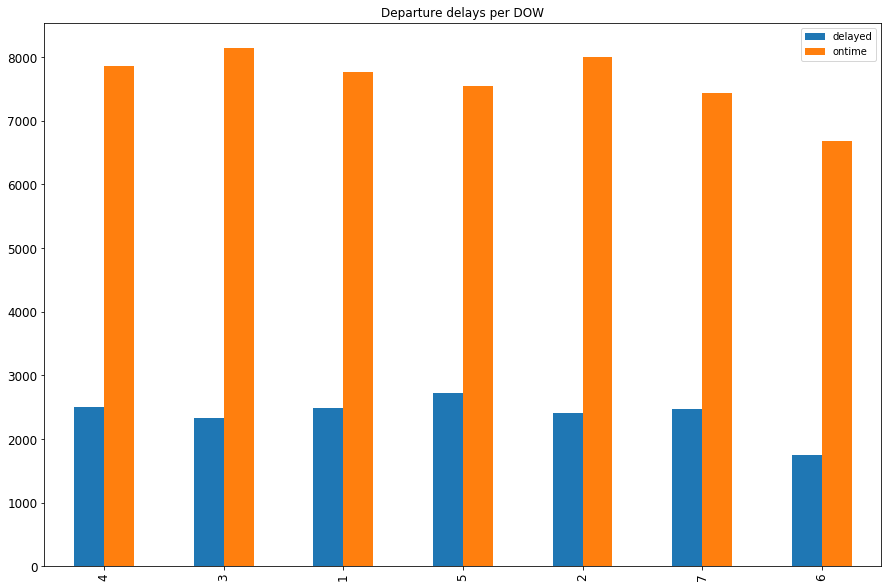

In [15]:
# How much delays per DOW
delayed=[]
ontime=[] 
DOW=df.DayOfWeek.unique() 
for d in DOW:
    delayed.append(df[(df['DayOfWeek']==d) & (df['del15']==1)].shape[0]) 
    ontime.append(df[(df['DayOfWeek']==d) & (df['del15']==0)].shape[0])
df2 = pd.DataFrame()
df2['delayed']=delayed 
df2['ontime']=ontime 
df2.index=DOW
ax = df2[['delayed','ontime']].plot(kind='bar', title ="Departure delays per DOW", figsize=(15, 10), legend=True, fontsize=12)
plt.show()

### MOY effect 

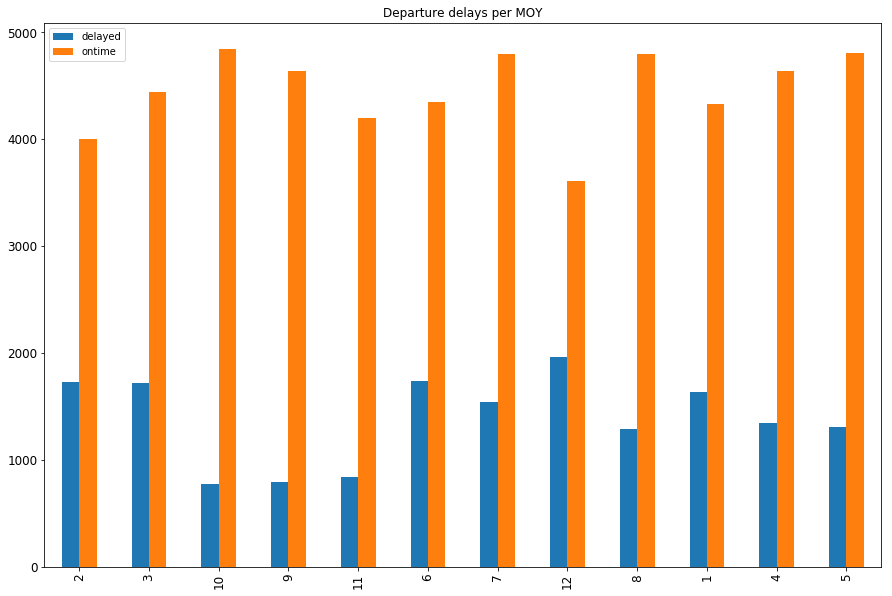

In [17]:
# How much delays per DOW
delayed=[]
ontime=[] 
MOY=df.Month.unique() 
for m in MOY:
    delayed.append(df[(df['Month']==m) & (df['del15']==1)].shape[0]) 
    ontime.append(df[(df['Month']==m) & (df['del15']==0)].shape[0])
df3 = pd.DataFrame()
df3['delayed']=delayed 
df3['ontime']=ontime 
df3.index=MOY
ax = df3[['delayed','ontime']].plot(kind='bar', title ="Departure delays per MOY", figsize=(15, 10), legend=True, fontsize=12)
plt.show()

## 3.Predicting departure delays

## Encoding categorical features

In [18]:

# Categorical  mask
categorical_feature_mask = df.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = df.columns[categorical_feature_mask].tolist()
categorical_cols.append('del15') # adding the target variable

In [19]:
categorical_cols

['Origin', 'Dest', 'del15']

In [20]:
# instantiate labelencoder object
le = LabelEncoder()
# apply le on categorical feature columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))
df[categorical_cols].head(10)


,Origin,Dest,del15
936661,78,75,0
1252712,150,196,0
934864,182,75,1
5754743,78,241,0
4861932,150,254,1
1111139,252,248,0
6441564,17,91,1
3088446,199,149,0
1036671,20,82,1
3632551,170,147,0


## Creating train and test sets 


In [21]:
#Creating test and train set
train_x, test_x, train_y, test_y = train_test_split(df.drop('del15', axis=1), df['del15'], test_size=0.2, random_state=42)

In [22]:
#Checking train and test shapes
print train_x.shape, test_x.shape, train_y.shape, test_y.shape

(56077, 6) (14020, 6) (56077,) (14020,)


## Creating an instance of the model

In [23]:
model = RandomForestClassifier(random_state=13)
model.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=13, verbose=0, warm_start=False)

## Making predictions


In [24]:
#making prediction
predicted = model.predict(test_x)
model.score(test_x, test_y)

0.7519971469329529

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, predicted)

array([[10071,   667],
       [ 2810,   472]])

### Next steps 
* Using one hot encoding
* Features engineering
* Tuning model parameters
* Scaling the model